## Course Information
INFO 521: Introduction to Machine Learning\
Instructor: Xuan Lu, College of Information Science

## Instructions
#### Objectives
This worksheet will assess your knowledge of basic commands in Python. Please review the lectures, suggested readings, and additional resources before starting the homework, as this document closely follows the provided materials.

#### Grading
Please note that grades are **NOT exclusively based on your final answers**. We will be grading the overall structure and logic of your code. Feel free to use as many lines as you need to answer each of the questions. I also highly recommend and strongly encourage adding comments (`#`) to your code. Comments will certainly improve the reproducibility and readability of your submission. Commenting your code is also good coding practice. **Specifically for the course, you’ll get better feedback if the TA is able to understand your code in detail.**

__Total score__: 100 points, with an additional 10 points available for extra credit.

#### Submission
This homework is due by the end of the week it is released (**Sunday, 11:59 pm AZ time**). Please contact the instructor if you are (i) having issues opening the assignment, (ii) not understanding the questions, or (iii) having issues submitting your assignment. Note that late submissions are subject to a penalty (see late work policies in the syllabus).
- Please submit a single Jupyter Notebook file (this file). Answers to each question should be included in the relevant block of code (see below). Rename your file to "**lastname_Hw3.ipynb**" before submitting. <font color='red'>A broken file won’t be graded, so please ensure that your file is accessible.</font> If a given block of code is causing issues and you didn't manage to fix it, please add comments.

#### Time commitment
Please reach out if you’re taking more than ~18h to complete (1) this homework, (2) reading the book chapters, and (3) going over the lectures. I will be happy to provide accommodations if necessary. **Do not wait until the last minute to start working on this homework**. In most cases, working under pressure will certainly increase the time needed to answer each of these questions and the instructor and the TA might not be 100% available on Sundays to troubleshoot with you.

#### Looking for help?
First, please go over the relevant readings for this week. Second, if you’re still struggling with any of the questions, do some independent research (e.g. stackoverflow is a wonderful resource). Don’t forget that your classmates will also be working on the same questions - reach out for help (check under the Discussion forum for folks looking to interact with other students in this class or start your own thread). Finally, the TA is available to answer any questions during office hours and via email.

## Questions
#### Author:
Name: Christian Ortmann\
Affiliation: Computing Sciences Researcher, SMMR; MSDS 25'

### Conceptual

#### Question 1

Describe the null hypotheses to which the _p_-values given in the table (see below). Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model.

|  | Coefficient | Std. error | t-statistics | p-value |
|---|:---:|:---:|:---:|:---:|
| Intercept | 2.939 | 0.3119 | 9.42 | <0.0001 |
| TV | 0.046 | 0.0014 | 32.81 | <0.0001 |
| Radio | 0.189 | 0.0086 | 21.89 | <0.0001 |
| Newspaper | -0.001 | 0.0059 | -0.18 | 0.8599 |

> **_Answer:_**  [BEGIN SOLUTION].

#### Question 2

Assume that you collected a dataset of 100 observations containing a single predictor and a quantitative response. Then, you decided to fit a (i) linear regression model to the data, as well as a separate (ii) cubic regression, i.e. $Y = β_{0} + β_{1}X^{1} + β_{2}X^{2} + β_{3}X^{3} + ϵ$.

a) Suppose that the true relationship between $X$ and $Y$ is linear, i.e. $Y = β_{0} + β_{1}X + ϵ$. Consider the training residual sum of squares (_RSS_) for the linear regression, and also the training _RSS_ for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

> **_Answer:_**  [BEGIN SOLUTION].

b) Answer part (a) using the test rather than training RSS.

> **_Answer:_**  [BEGIN SOLUTION].

c) Suppose that the true relationship between $X$ and $Y$ is not linear. However, we don’t know how far it is from linear. Consider the training _RSS_ for the linear regression, and also the training _RSS_ for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

> **_Answer:_**  [BEGIN SOLUTION].

d) Answer (c) using test rather than training _RSS._

> **_Answer:_**  [BEGIN SOLUTION].

#### Question 3

a) Discuss the implications that uncertainty in $X$ would have on parameter estimates based on linear regression models. Should we care about error in $X$ when fitting OLS regressions? 

> **_Answer:_**  [BEGIN SOLUTION].

b) Provide a brief discussion on the concept of regression dilution.

> **_Answer:_**  [BEGIN SOLUTION].

c) Are there any linear regression models that account for uncertainty in $X$ and $Y$? Please do some independent research and cite your sources.

> **_Answer:_**  [BEGIN SOLUTION].

d) Distinguish between least squares and maximum likelihood in the context of linear regression models.

> **_Answer:_**  [BEGIN SOLUTION].

### Applied
Feel free to use any function you find suitable if a specific function is not explicitly required.

#### Question 4

This question involves the use of simple linear regression on the `Auto` data set.

a) Use the `statsmodels.api` package to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Print the regression results. 

In [439]:
# BEGIN SOLUTION

import statsmodels.api as sm
import pandas as pd

#---------------------------------------------------------
#code chunk from HW2 to get rid of NA issues in horsepower
#---------------------------------------------------------
auto = pd.read_csv('/Users/cortmann/Desktop/521 - Machine Learning/INFO521/hw2_data/Auto.data', delim_whitespace=True) #space delimited (not tsv), use delim white space for this
print(auto.isna().any()) #check for missing/na values
auto = auto.replace("?", 'NA') #replace ? with NAs
auto = auto[~auto['horsepower'].str.contains('NA')] #drop rows with NAs, for some reason drop ? doesnt work
auto['horsepower'] = pd.to_numeric(auto['horsepower'])
auto.head()
auto.dtypes
#---------------------------------------------------------

x = sm.add_constant(auto["horsepower"]) #add constant for simple linear regression
smModel = sm.OLS(auto["mpg"], x).fit()
print(smModel.summary()) #print whole summary
print(smModel.params) #show just the coefs

#https://campus.datacamp.com/courses/intermediate-regression-with-statsmodels-in-python/parallel-slopes-c88dacee-fa74-4c3e-91af-e125a79611a6?ex=12 for RSE
print((smModel.mse_resid)**(1/2)) #RSE is sqrt of MSE



# END SOLUTION

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           7.03e-81
Time:                        10:05:23   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         


/var/folders/6n/cwl6lb1j5j54r8zxq47cqpbr0000gn/T/ipykernel_29774/3167133921.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto = pd.read_csv('/Users/cortmann/Desktop/521 - Machine Learning/INFO521/hw2_data/Auto.data', delim_whitespace=True) #space delimited (not tsv), use delim white space for this


Then, answer the questions below:\
i. Is there a relationship between the predictor and the response?

> **_Answer:_**  [Yes, a very small negative relationship between horsepower and mpg. The coefficient of horsepower is -0.16, which suggests a small decrease in MPG as horsepower increases by one unit].

ii. How strong is the relationship between the predictor and the response? Focus on the _RSE_, estimated $R^2$, and _slope._

> **_Answer:_**  [RSE is 4.91, R^2 is 0.606, and slope is the coefficient of horsepower, which is -0.16. Based on RSE, we can see that there is about 5 units of irreducible error from the model fit and the actual value which means that data points are ~ 5 units away from the regression line, on average. The R^2 tells us about the amount of variance in the data points explained by the regression fit; in this case we have a value of 60.6% (out of 100%) which suggests that we have a moderately fair fit. Essentially the fit of the line can only explain 60.6% of our data for the best possible fit. The slope is a small negative value, suggesting that the influence of horsepower is minimal on MPG (for each unit changed)].

iii. Is the relationship between the predictor and the response positive or negative?

> **_Answer:_**  [Negative].

iv. What is the predicted mpg associated with a __horsepower__ of __98__? What are the associated 95% confidence and prediction intervals?

In [440]:
# BEGIN SOLUTION
test = sm.add_constant([98], has_constant="add") #use has constant = add to add a constant to 
pred = smModel.get_prediction(test) #get_prediction is similar to prediction  but gives further information 
pred_summary = pred.summary_frame(alpha=0.05)  # 95% confidence intervals of summary frame (mean of all values)
print(pred_summary)
# END SOLUTION

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


ANS: Predicted value is 24.467, which is equivalent to plugging 98 into the equation for the regression line of y = -0.15x+39.9. We use summary frame to return the confidence intervals of the predction (average for all predictions, but since we only have one value we have the actual value of the prediction). Our confidence intervals show the range that 95% of the predicted values will lie within an interval of 23.9 to 25.9. The prediction interval is 14.8-34.1 for our prediction and means that the prediction of 98, when predicted 100 times, 95 of them will result in an mpg of ~15 to 34.

v. Now, please briefly explain the main use of inverse predictions. List at least two practical examples.

> **_Answer:_**  [Main use of inverse prediction is to determine data that may not be directly observable or measurable. One use case may be a test where temperature limits a sensors use range, so we could predict a temperature where a specific condition occurs based on the linear relationship. Another use case may be fixing missing data points rather than dropping them or imputating based on means/modes by assuming a linear relationship about the rest of the data.].

vi. Finally, predict horsepower from the same mpg value predicted in (__iv__). Comment on your results.

In [441]:
# BEGIN SOLUTION
#assuming a relationship of x = (y-39.9)/-0.15

x = (pred_summary["mean"]-smModel.params[0])/(smModel.params[1])
print(x)

# END SOLUTION

0    98.0
Name: mean, dtype: float64


/var/folders/6n/cwl6lb1j5j54r8zxq47cqpbr0000gn/T/ipykernel_29774/2229965241.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  x = (pred_summary["mean"]-smModel.params[0])/(smModel.params[1])


ANS: Here we predict the x value exactly as we put it into the model earlier. This is because our relationship is inflexible and linear, so we can simply rearrage the equation to solve for x and plug in our predicted y.

b) Plot the response and the predictor. Display the least squares regression line as well.

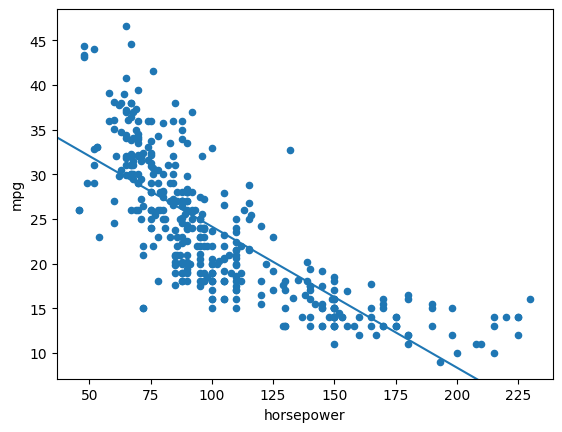

In [442]:
# BEGIN SOLUTION

import matplotlib.pyplot as plt
# scatter-plot data
ax1 = auto.plot(x='horsepower', y='mpg', kind='scatter')
# plot regression line
fig = sm.graphics.abline_plot(model_results=smModel, ax=ax1) #plot the regression line
plt.show()  #show results


# END SOLUTION

c) Produce diagnostic plots of the least squares regression fit using any suitable package or function. Comment on any issues you observe with the fit.

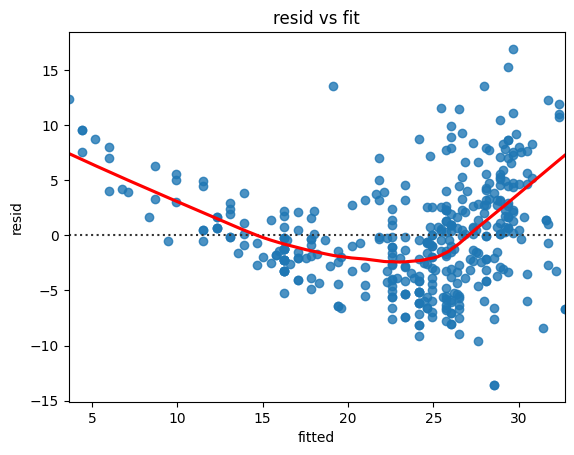

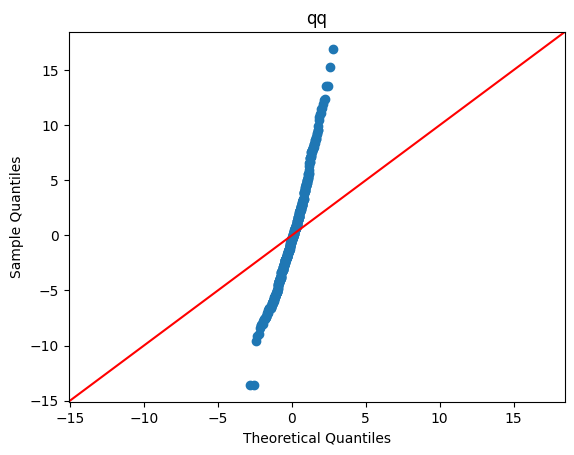

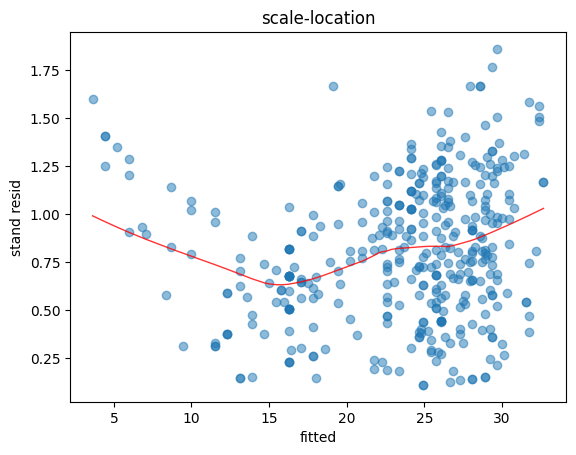

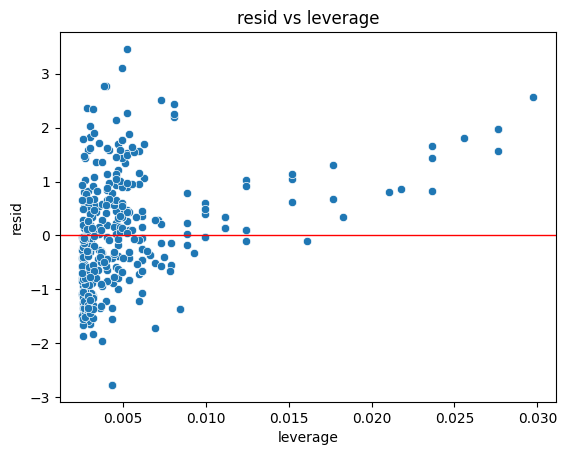

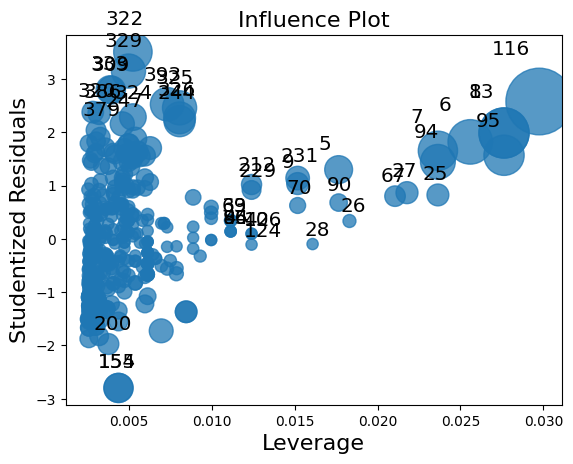

In [443]:
# BEGIN SOLUTION

import seaborn as sns

#first three plots created with help from https://emredjan.medium.com/emulating-r-regression-plots-in-python-43741952c034

#---------------------------
#residual vs fitted
#---------------------------

residFit = sns.residplot(x = smModel.fittedvalues, y = auto['mpg'], lowess=True, line_kws= {'color':'red'})
plt.title('resid vs fit')
plt.xlabel('fitted')
plt.ylabel('resid')

#---------------------------
#qq
#---------------------------

qq = sm.graphics.qqplot(smModel.resid, line = '45')
plt.title('qq')

#---------------------------
#scale-location
#---------------------------

plt.figure()
plt.scatter(smModel.fittedvalues, np.sqrt(np.abs(smModel.get_influence().resid_studentized_internal)), alpha=0.5)
sns.regplot(x = smModel.fittedvalues, y = np.sqrt(np.abs(smModel.get_influence().resid_studentized_internal)), 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('scale-location')
plt.xlabel('fitted')
plt.ylabel('stand resid')

#---------------------------
#residuals vs leverage
#---------------------------

plt.figure()
plot = sns.scatterplot(x=smModel.get_influence().hat_matrix_diag, y=smModel.get_influence().resid_studentized_internal) 
plot.axhline(y=0, linewidth=1, color = 'red')
plt.title('resid vs leverage')
plt.xlabel('leverage')
plt.ylabel('resid')

#---------------------------
#influence
#---------------------------

influ = sm.graphics.influence_plot(smModel, criterion="cooks") 

# END SOLUTION

ANS: The distinct curve of the fitted vs residuals suggests that the linear regression may not capture non-linear relationships in the data. The delineation of the QQ line from the 45 degree reference line suggests that our data may not follow a standard distribution. We may need to standardized the data for a better linear model. The scale location plot shows an upcurved lowess line, which suggests that the data may have somee constant variance, appearing around the median, and the variance increases around the tails. Finally, our residual vs leverage and influence plots show that we have a few points with higher leverage of around 0.02-0.03. These points may be influencing our model more so that the rest of the population, so to improve our fit and coefficients, we should probably remove them. Overall, our fit can be improved by removing some data points and performing some transformations.

#### Question 5

This question involves the use of multiple linear regression on the `Auto` data set. Read the dataset first:

In [444]:
# BEGIN SOLUTION
auto = pd.read_csv('/Users/cortmann/Desktop/521 - Machine Learning/INFO521/hw2_data/Auto.data', delim_whitespace=True) #space delimited (not tsv), use delim white space for this
auto = auto.replace("?", 'NA') #replace ? with NAs
auto = auto[~auto['horsepower'].str.contains('NA')] #drop rows with NAs, for some reason drop ? doesnt work
auto['horsepower'] = pd.to_numeric(auto['horsepower'])
# END SOLUTION

/var/folders/6n/cwl6lb1j5j54r8zxq47cqpbr0000gn/T/ipykernel_29774/4053352793.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto = pd.read_csv('/Users/cortmann/Desktop/521 - Machine Learning/INFO521/hw2_data/Auto.data', delim_whitespace=True) #space delimited (not tsv), use delim white space for this


a) Produce a scatterplot matrix which includes all of the variables in the data set.

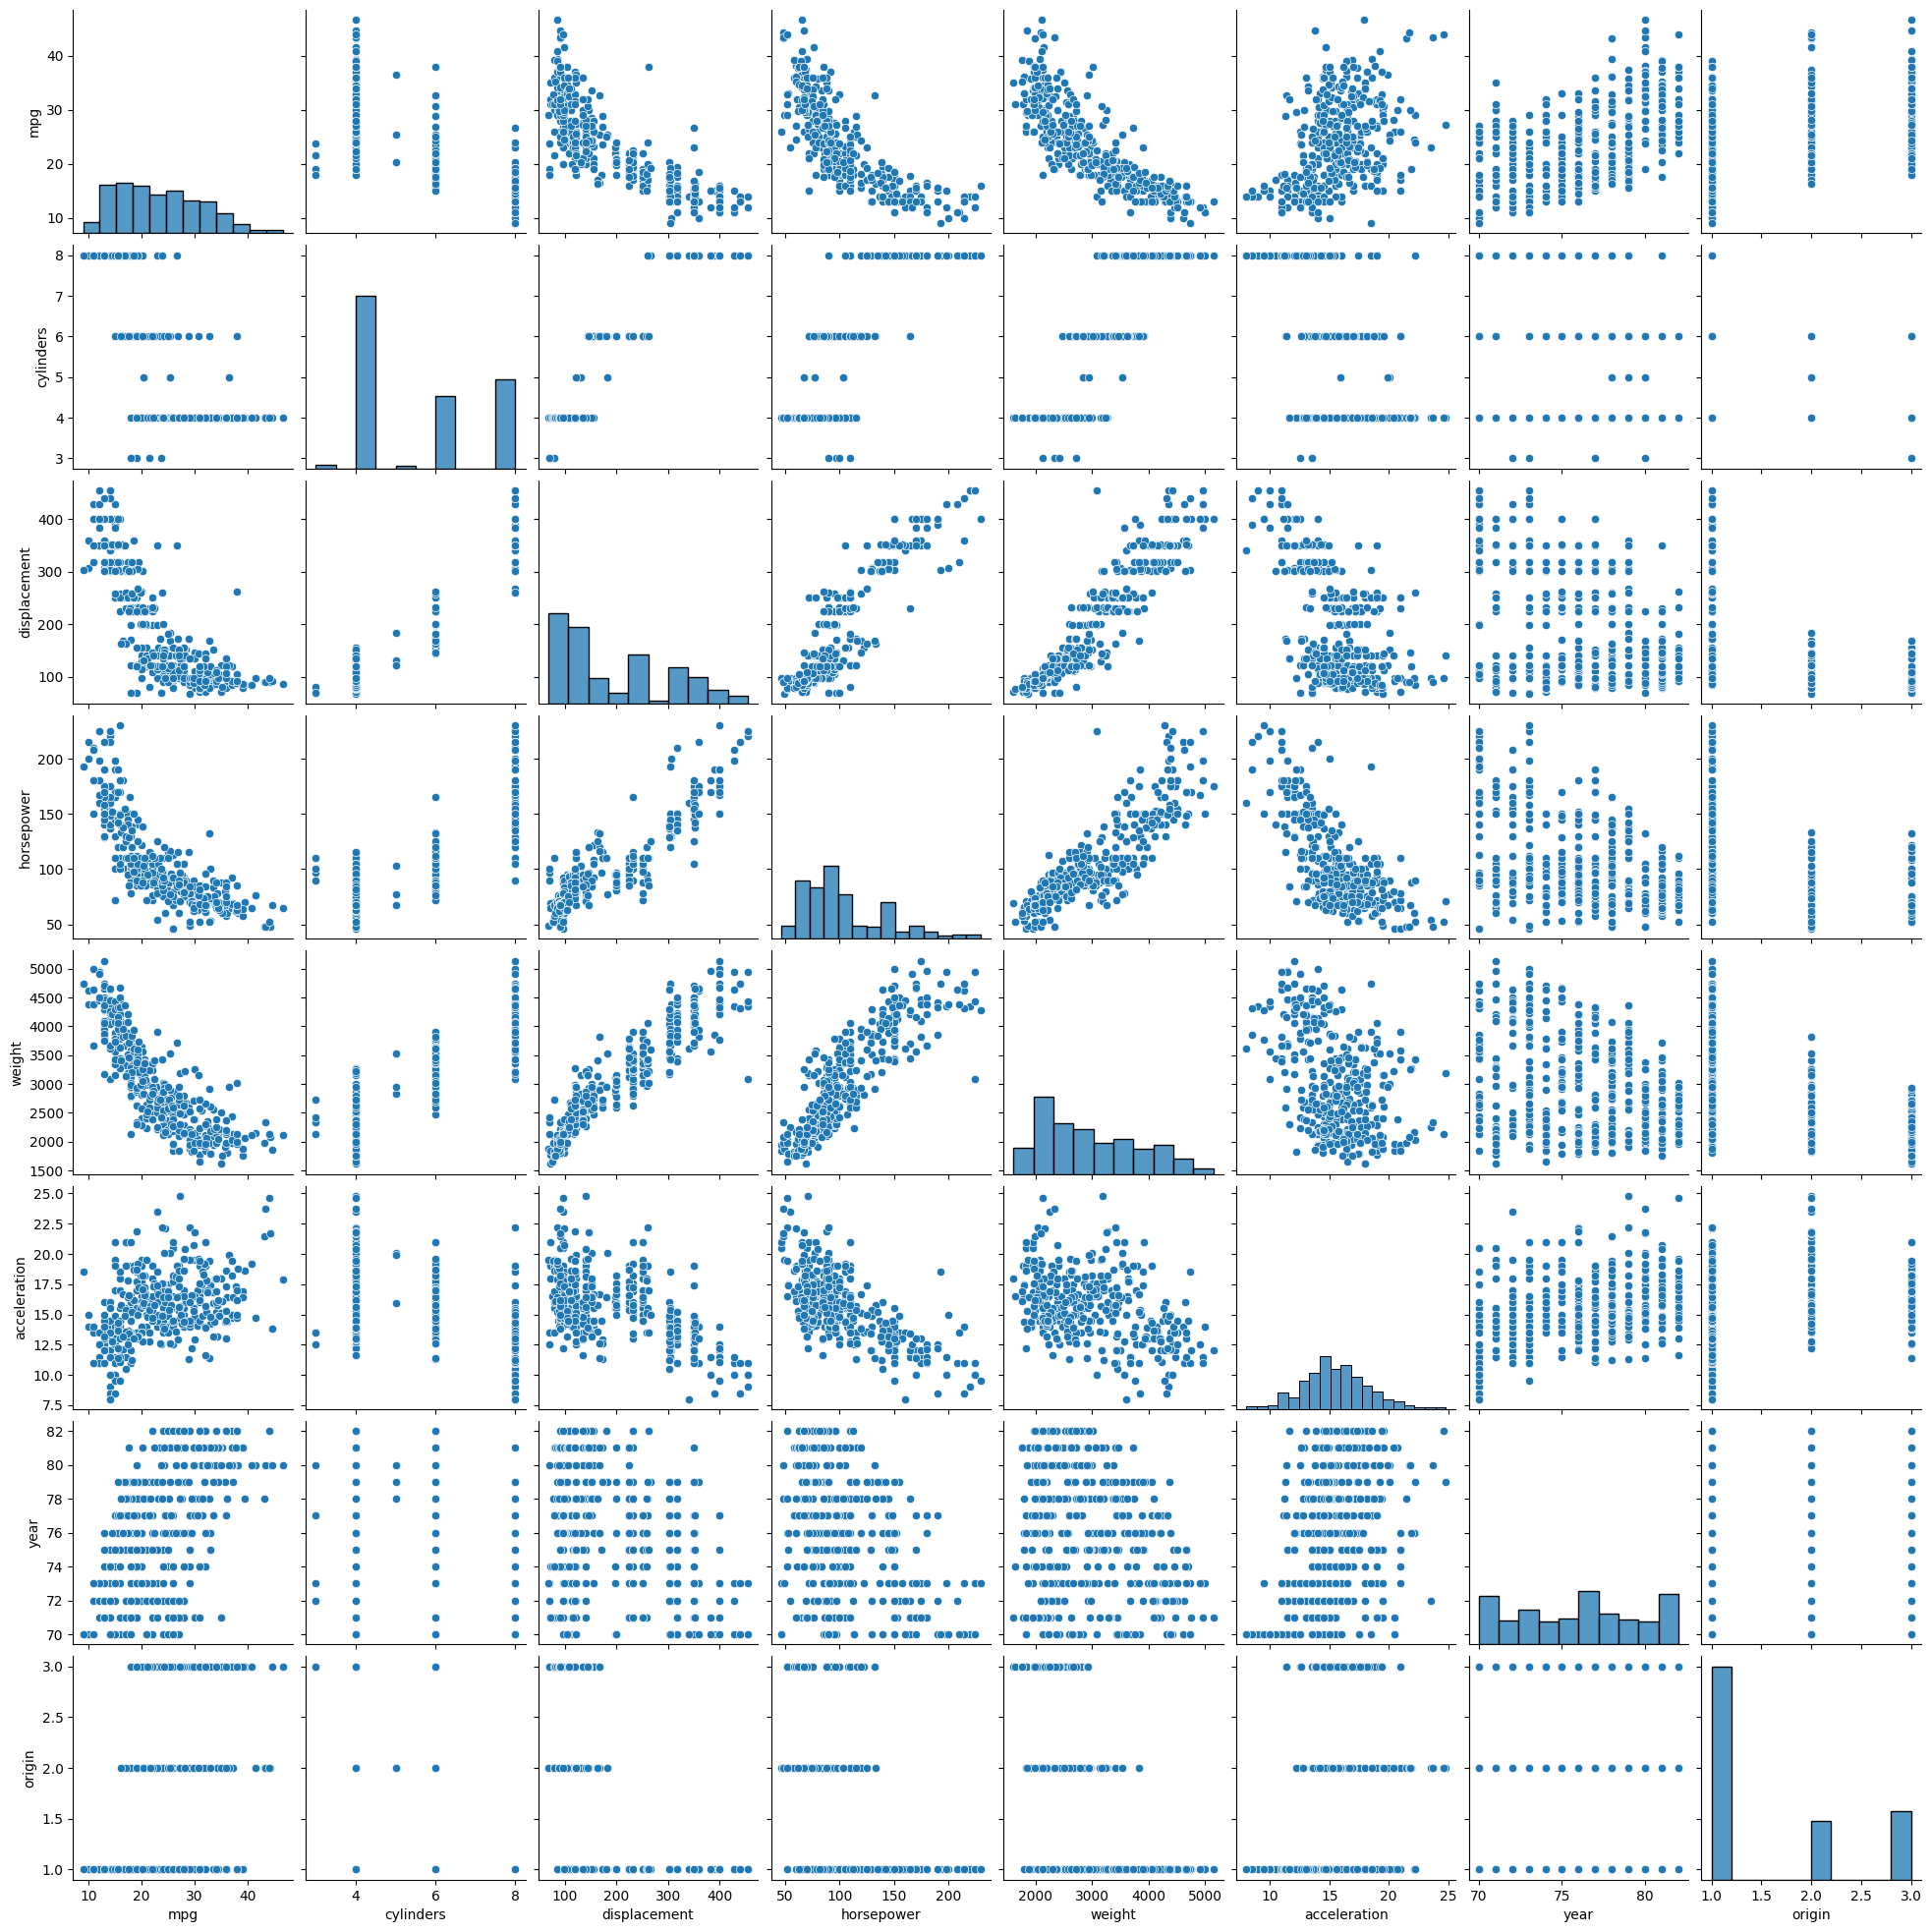

In [445]:
# BEGIN SOLUTION
import seaborn as sns #use seaborn for some visualizations

sns.pairplot(auto)

# END SOLUTION

b) Compute the matrix of correlations between the variables. You will need to exclude the name variable, which is qualitative. Also plot the corresponding correlation matrix.

<Axes: >

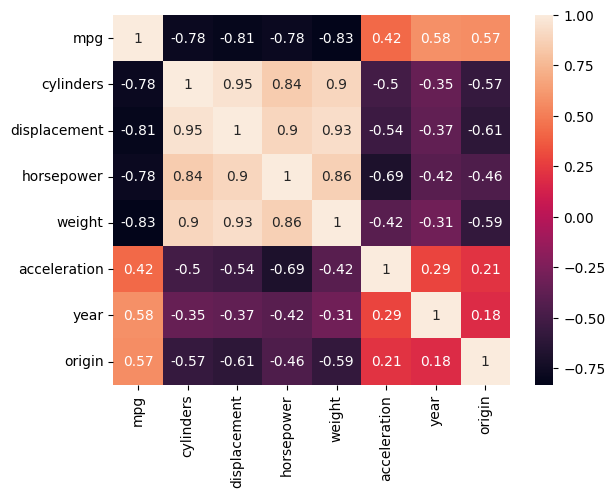

In [446]:
# BEGIN SOLUTION
corrData = auto.drop(columns = ['name'])
sns.heatmap(corrData.corr(), annot=True) #compute the correlations and plot in at the same time

# END SOLUTION

c) Use the `statsmodels.api` package to perform a multiple linear regression with `mpg` as the response and all other variables except name as the predictors. Print the results. Use the questions below to comment on the output.

In [447]:
# BEGIN SOLUTION

data = auto.drop(columns = ['name','mpg'])

mlrModel = sm.OLS(auto['mpg'], data).fit()
print(mlrModel.summary())


# END SOLUTION

                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2933.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):                        0.00
Time:                        10:05:27   Log-Likelihood:                         -1030.4
No. Observations:                 392   AIC:                                      2075.
Df Residuals:                     385   BIC:                                      2103.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

i. Is there a significant association between the predictors and the response?

> **_Answer:_**  [Yes, though it varies by the predictor. Some predictors such as horsepower, weight, and displacement have a small association with mpg, while other predictors such as year, origin, and cylinders have a larger association.].

ii. Which predictors appear to have a statistically significant relationship to the response?

> **_Answer:_**  [Using a p-value threshold of 0.05, all predictors except for acceleration appear to be statistically significant.].

iii. What does the coefficient for the year variable suggest?

> **_Answer:_**  [The coefficient suggests that for each unit increase in year, we have a 0.5 unit increase in mpg].

(d) Produce diagnostic plots of the linear regression fit. Again, feel free to use any package or function to create these plots. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

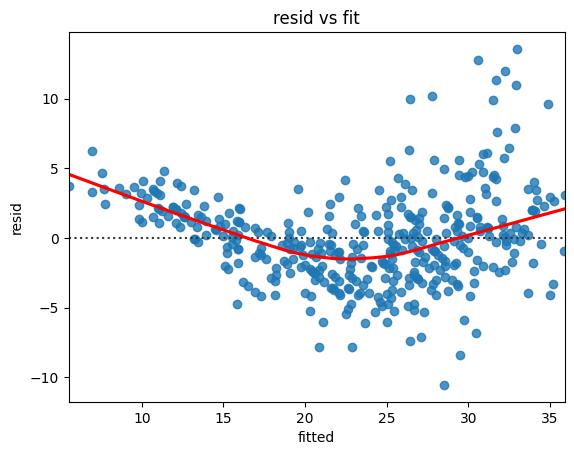

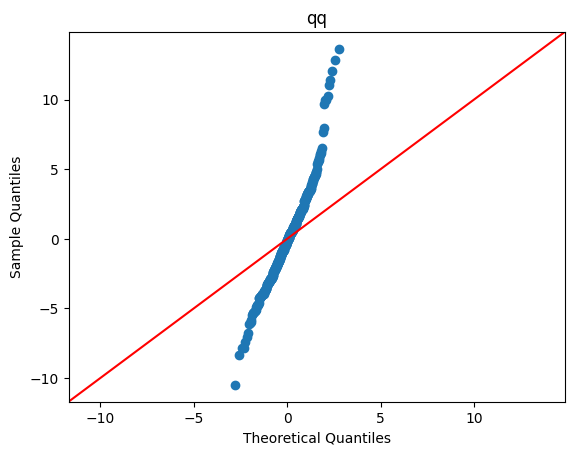

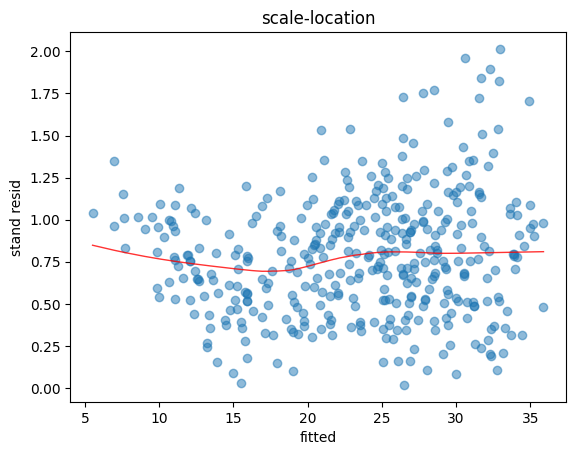

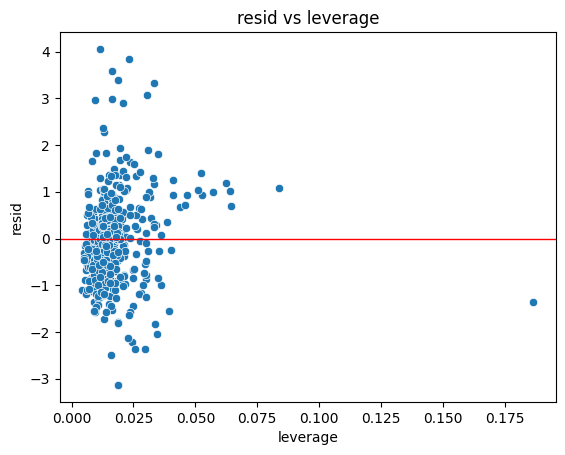

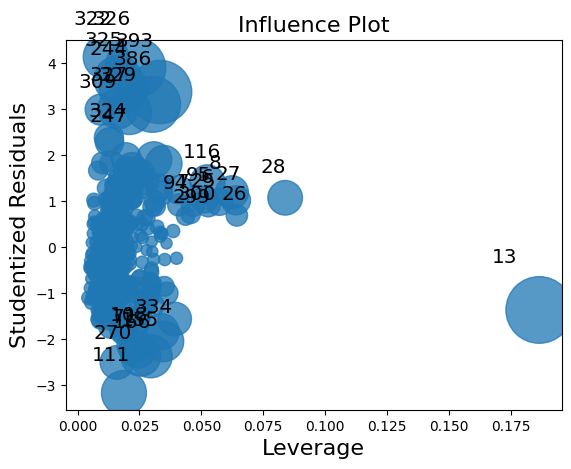

In [448]:
# BEGIN SOLUTION

import numpy as np
model = mlrModel

#---------------------------
#residual vs fitted
#---------------------------

residFit = sns.residplot(x = model.fittedvalues, y = auto['mpg'], lowess=True, line_kws= {'color':'red'})
plt.title('resid vs fit')
plt.xlabel('fitted')
plt.ylabel('resid')

#---------------------------
#qq
#---------------------------

qq = sm.graphics.qqplot(model.resid, line = '45')
plt.title('qq')

#---------------------------
#scale-location
#---------------------------

plt.figure()
plt.scatter(model.fittedvalues, np.sqrt(np.abs(model.get_influence().resid_studentized_internal)), alpha=0.5)
sns.regplot(x = model.fittedvalues, y = np.sqrt(np.abs(model.get_influence().resid_studentized_internal)), 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.title('scale-location')
plt.xlabel('fitted')
plt.ylabel('stand resid')

#---------------------------
#residuals vs leverage
#---------------------------

plt.figure()
plot = sns.scatterplot(x=model.get_influence().hat_matrix_diag, y=model.get_influence().resid_studentized_internal) 
plot.axhline(y=0, linewidth=1, color = 'red')
plt.title('resid vs leverage')
plt.xlabel('leverage')
plt.ylabel('resid')

#---------------------------
#influence
#---------------------------

influ = sm.graphics.influence_plot(model, criterion="cooks") 


# END SOLUTION

> **_Answer:_**  [ANS: The distinct curve of the fitted vs residuals suggests that the linear regression may not capture non-linear relationships in the data, we also may have outliers causing the curve of the data (higher residuals). The delineation of the QQ line from the 45 degree reference line suggests that our data may not follow a standard distribution. We may need to standardized the data for a better linear model. The scale location plot shows a relatively flat and straight lowess line, which suggests that the data has constant variance. Finally, our residual vs leverage and influence plots show that we have a point with very high leverage at 0.175. This data point also has a high Cook's Distance, which means that if we remove the value and refit the model, our coefficients may change drastically. The point at index 13 refers to buick estate wagon (sw)



(e) Fit linear regression models with interaction effects. Please explore a few different models (~3–4 models). Do any interactions appear to be statistically significant in any of the models you examined? Feel free to use stepwise selection if interested. Your model exploration does not have to be extensive by any means.

In [449]:
# BEGIN SOLUTION

#-------------------------------------------------------------------
#ORIGINAL
#-------------------------------------------------------------------
print(mlrModel.aic)
print(mlrModel.rsquared)

#-------------------------------------------------------------------
#drop index 13
#-------------------------------------------------------------------

drop13 = auto.drop(columns = ['name','mpg'],index = [13])
mlrModelwo13 = sm.OLS(auto['mpg'].drop(index = [13]), drop13).fit()
print(mlrModelwo13.aic)
print(mlrModelwo13.rsquared)

#-------------------------------------------------------------------
#drop index 28
#-------------------------------------------------------------------


drop28 = auto.drop(columns = ['name','mpg'],index = [28])
mlrModelwo28 = sm.OLS(auto['mpg'].drop(index = [28]), drop28).fit()
print(mlrModelwo28.aic)
print(mlrModelwo28.rsquared)


#-------------------------------------------------------------------
#combine removal of both 13 and 28
#-------------------------------------------------------------------


drop2813 = auto.drop(columns = ['name','mpg'],index = [13,28])
mlrModelwo1328 = sm.OLS(auto['mpg'].drop(index = [13,28]), drop2813).fit()
print(mlrModelwo1328.aic)
print(mlrModelwo1328.rsquared)

# END SOLUTION

2074.735667277984
0.981595015306477
2068.5847736030732
0.9816688756472178
2069.299770189018
0.9816441522880832
2063.164211598136
0.9817173396977996


> **_Answer:_**  [Using Akaike Information Criterion (AIC) and R-squared as a metric for model fit, you can see that as we step from original, to dropping index 13, then 28, then both, we have an incrementally decreasing AIC value, which is a sign of the fit improving as a smaller AIC is better. We want to focus on the change between models rather than absolute values here. Additionally, we seen an incrementally increasing or static R-squared value, corroborating the improving fit explained by AIC].

(f) Try a few different transformations of the variables, such as `log(X)`, `sqrt(X)`, $X^2$. Comment on your findings.

In [450]:
# BEGIN SOLUTION

#------------------------------------------
#original
#------------------------------------------

data = auto.drop(columns = ['name','mpg'])
mlrModel = sm.OLS(auto['mpg'], data).fit()
print(mlrModel.aic)
print(mlrModel.rsquared)

#------------------------------------------
#HP squared
#------------------------------------------
data = auto.drop(columns = ['name','mpg'])
data['horsepower'] = data['horsepower']**2
mlrModel = sm.OLS(auto['mpg'], data).fit()
print(mlrModel.aic)
print(mlrModel.rsquared)

#------------------------------------------
#sqrt HP
#------------------------------------------

data = auto.drop(columns = ['name','mpg'])
data['horsepower'] = np.sqrt(data['horsepower'])
mlrModel = sm.OLS(auto['mpg'], data).fit()
print(mlrModel.aic)
print(mlrModel.rsquared)


# END SOLUTION

2074.735667277984
0.981595015306477
2084.308913492798
0.9811400036881871
2050.1665466966847
0.9827131653799841


> **_Answer:_**  [In the case of transforming a variable vs dropping/imputating values, you can see that transforming the values improves the model fit faster than dropping or imputating values. Here as we change the form of horsepower (HP), the model fit actually gets worse initially when we square horsepower, but when we take the square root, we are able to improve the fit (2.5x better in magnitude than when we have a worse fit with HP squared). These changes are evident with two evaluative parameters, R squared and AIC].

#### Question 6

In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to set a random seed prior to starting part (a) to ensure consistent results.

In [451]:
# BEGIN SOLUTION
import random

np.random.seed(123)

# END SOLUTION

a) Create a vector, `x`, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, `X`.

In [452]:
# BEGIN SOLUTION

x = np.random.normal(0,1,100) #100 observations of mean = 0, variance = 1
x

# END SOLUTION

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924, -0.42891263,  1.26593626, -0.8667404 ,
       -0.67888615, -0.09470897,  1.49138963, -0.638902  , -0.44398196,
       -0.43435128,  2.20593008,  2.18678609,  1.0040539 ,  0.3861864 ,
        0.73736858,  1.49073203, -0.93583387,  1.17582904, -1.25388067,
       -0.6377515 ,  0.9071052 , -1.4286807 , -0.14006872, -0.8617549 ,
       -0.25561937, -2.79858911, -1.7715331 , -0.69987723,  0.92746243,
       -0.17363568,  0.00284592,  0.68822271, -0.87953634,  0.28362732,
       -0.80536652, -1.72766949, -0.39089979,  0.57380586,  0.33858905,
       -0.01183049,  2.39236527,  0.41291216,  0.97873601,  2.23814334,
       -1.29408532, -1.03878821,  1.74371223, -0.79806274,  0.02968323,
        1.06931597,  0.89070639,  1.75488618,  1.49564414,  1.06939267,
       -0.77270871,  0.79486267,  0.31427199, -1.32626546,  1.41729905,
        0.80723653,  0.04549008, -0.23309206, -1.19830114,  0.19

b) Create a vector, `eps`, containing 100 observations drawn from a $N(0, 0.25)$ distribution — a normal distribution with mean zero and variance `0.25`.

In [453]:
# BEGIN SOLUTION

eps = np.random.normal(0,0.25,100) #100 observations of mean = 0, variance = 0.25
eps

# END SOLUTION

array([ 0.16051367, -0.49447198,  0.17806616,  0.64957598, -0.0061565 ,
        0.00853553,  0.04488737, -0.46549393,  0.10653666, -0.40135244,
       -0.1069199 ,  0.31071739, -0.18380424,  0.12531225,  0.25318476,
        0.06968521, -0.34273712, -0.08311882,  0.48985284, -0.50626144,
       -0.0689465 , -0.13802702,  0.03018684,  0.1870539 ,  0.40217274,
       -0.0675581 ,  0.20308533,  0.12493504,  0.11858682, -0.14098098,
       -0.24933037, -0.27501078, -0.1891093 ,  0.08042164,  0.19023735,
        0.08086721, -0.13723877,  0.45149253,  0.37971641, -0.08850003,
       -0.20585785,  0.03255374,  0.31682466,  0.08319124,  0.13913718,
       -0.05302003,  0.11406772,  0.38613611, -0.0599172 ,  0.03582693,
        0.06345412,  0.07093134, -0.35297222, -0.46921716, -0.25491377,
        0.04198557,  0.13846404, -0.13266864,  0.34431437, -0.03579399,
        0.005079  , -0.04849097,  0.0335067 ,  0.17611852,  0.16641336,
       -0.22460574,  0.38091594, -0.27375661,  0.01980675, -0.06

c) Using `x` and `eps`, generate a vector `y` according to the model $Y = -1 + 0.5X + ϵ$. What is the length of the vector `y`? What are the values of $β_0$ and $β_1$ in this linear model?

In [454]:
# BEGIN SOLUTION

y = -1 + (0.5*x) + eps
print(y)
print(f'length of y is {len(y)}')

# END SOLUTION

[-1.38230163 -0.99579926 -0.68044459 -1.10357138 -1.29545662 -0.1657462
 -2.16845225 -1.67995024 -0.26049521 -1.83472264 -1.44636298 -0.7366371
 -0.43810943 -1.19413875 -0.96880622 -1.14749042 -0.23977208  0.01027423
 -0.00812022 -1.31316824 -0.70026222 -0.392661   -1.43773009 -0.22503157
 -1.22476759 -1.38643385 -0.34336207 -1.58940531 -0.95144754 -1.57185843
 -1.37714005 -2.67430533 -2.07487585 -1.26951697 -0.34603144 -1.00595063
 -1.13581582 -0.20439612 -1.06005177 -0.94668637 -1.60854111 -1.83128101
 -0.87862524 -0.62990582 -0.6915683  -1.05893528  0.31025036 -0.40740781
 -0.57054919  0.1548986  -1.58358854 -1.44846277 -0.48111611 -1.86824853
 -1.24007215 -0.42335644 -0.41618276 -0.25522555  0.09213644 -0.50109766
 -1.38127536 -0.65105963 -0.8093573  -1.48701421 -0.12493712 -0.82098747
 -0.59633902 -1.39030264 -1.57934382 -0.96883711 -1.02802836 -1.43435764
 -0.60410142 -1.53037471 -1.96077868 -0.11215411 -1.12483696 -1.21582113
 -1.51666331 -1.76798685 -0.34901611 -0.97953717  0.1

The length of y is 100 because we are generating a value for y 100 times, once for each value at each index in x and eps. The $B_o$ is -1 and the $B_1$ is 0.5 based on the given equation.

d) Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe.

(-3.0, 3.0)

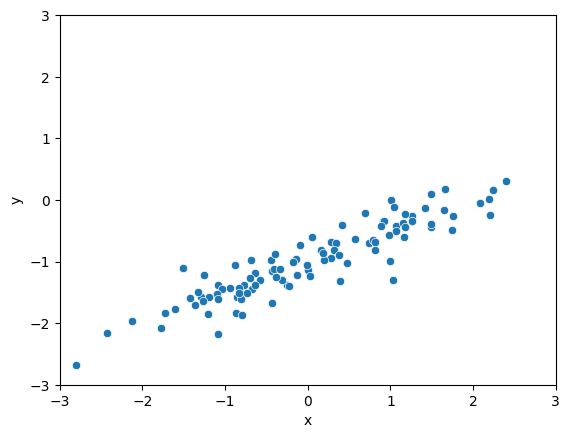

In [455]:
# BEGIN SOLUTION

sns.scatterplot(x=x,y=y)
plt.xlabel('x');
plt.ylabel('y'); #add label and remove weird output text with the addition of a semicolon
plt.xlim(-3,3)
plt.ylim(-3,3)

# END SOLUTION

> **_Answer:_**  [The relationship between x and y is very linear, as the line of best fit is very close to 0.5. Essentially, for each step in x, there is a 1/2 step in y.].

e) Fit a least squares linear model that relates y and `x`. Comment on the model obtained. How do the estimated coefficients (slope and intercept) compare to the true values used to simulate the data?

In [456]:
# BEGIN SOLUTION

xC = sm.add_constant(x)
q6Model = sm.OLS(y,xC).fit() #y dependent, x independent
q6Model.summary()

# END SOLUTION

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     521.7
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           4.95e-41
Time:                        10:05:28   Log-Likelihood:               -0.20540
No. Observations:                 100   AIC:                             4.411
Df Residuals:                      98   BIC:                             9.621
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0048      0.025    -41.011      0.000      -1.053      -0.956
x1             0.4959      0.022     22.841      0.000       0.453       0.539
==============================================================================
Omnibus:                        5.027   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.081   Jarque-Bera (JB):                5.131
Skew:                          -0.308   Prob(JB):                       0.0769
Kurtosis:                       3.924   Cond. No.                         1.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **_Answer:_**  [The output of the model is very similar to assumptions made from the plot in the previous question. We guessed a slope of 0.5 and the model fit a slope of 0.475. The slope of the true values of the data was 0.5, so we were also close in that regard. Finally, the intercept of the model is -1.0048 so the intercept of our model is similar to our true value of -1. The R squared of 0.84 suggests that we have a good fit.].

f) Display the least squares line on the scatterplot obtained in (d). Draw the true line on the plot, in a different color. Create an appropriate legend. 

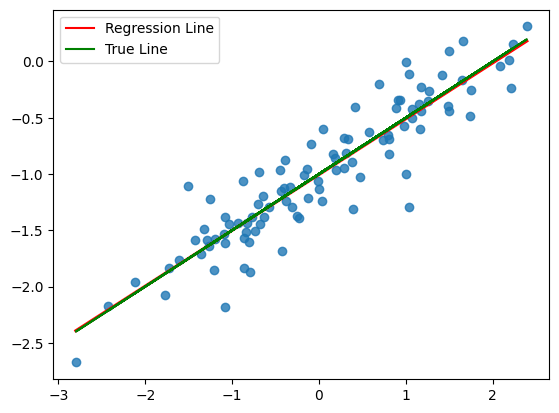

In [457]:
# BEGIN SOLUTION

sns.regplot(x=x,y=y, line_kws={'color':'red'}, ci=False)
plt.plot([], [], label='Regression Line', color='red') #plot nothing to get an option to have a label for the regression line
plt.plot(x, -1+(0.5*x), label = 'True Line', color ='green' )
plt.legend();

# END SOLUTION

g) Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$. Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [458]:
# BEGIN SOLUTION
xpoly = pd.DataFrame(data = {'x':x, 'x^2':x**2}) #because we can only feed in a dataframe

polyModel = sm.OLS(y, xpoly).fit()

print('non quad term r2' , q6Model.rsquared)
print('non quad term aic' , q6Model.aic)

print('quad term r2' , polyModel.rsquared)
print('quad term aic' , polyModel.aic)



# END SOLUTION

non quad term r2 0.8418598186216624
non quad term aic 4.410792429399493
quad term r2 0.5344164633196922
quad term aic 241.68442313450848


> **_Answer:_**  [As seen the above output, the addition of the quadratic term drops our R squared by 30.7% and increases our AIC by 237. This means that our model fit is drastically worse with the addition of the quadratic term].

h) Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model analyzed in this section should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term ϵ in (b). Describe your results.

length of y is 100


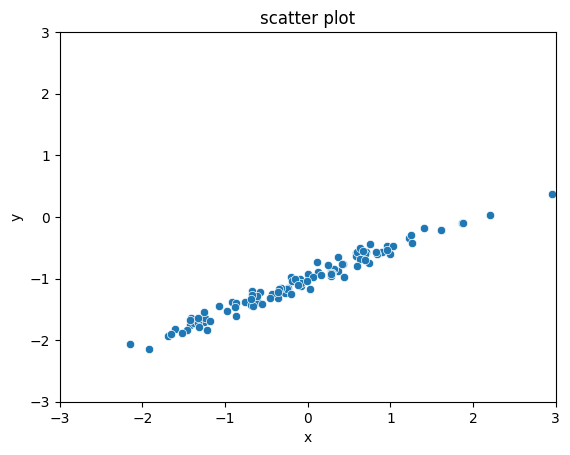

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     3297.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           2.97e-77
Time:                        10:05:28   Log-Likelihood:                 102.97
No. Observations:                 100   AIC:                            -201.9
Df Residuals:                      98   BIC:                            -196.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0117      0.009   -115.352      0.0

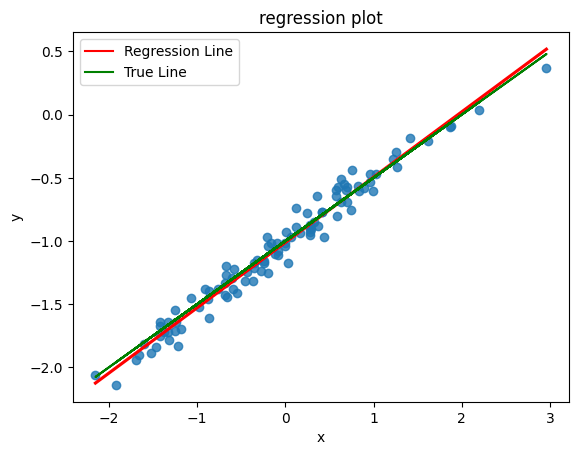

In [459]:
# BEGIN SOLUTION

#a
x = np.random.normal(0,1,100) #100 observations of mean = 0, variance = 1
x

#b
eps = np.random.normal(0,0.1,100) #100 observations of mean = 0, variance = 0.1 (variance down from 0.25...less noise)
eps

#c
y = -1 + (0.5*x) + eps
print(f'length of y is {len(y)}')

#d
sns.scatterplot(x=x,y=y)
plt.xlabel('x');
plt.ylabel('y'); #add label and remove weird output text with the addition of a semicolon
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title('scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#e
xC = sm.add_constant(x)
q6ModelLessNoise = sm.OLS(y,xC).fit() #y dependent, x independent
print(q6ModelLessNoise.summary())

#f
sns.regplot(x=x,y=y, line_kws={'color':'red'}, ci=False)
plt.plot([], [], label='Regression Line', color='red') #plot nothing to get an option to have a label for the regression line
plt.plot(x, -1+(0.5*x), label = 'True Line', color ='green' )
plt.title('regression plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

# END SOLUTION

> **_Answer:_**  [Here I have repeated steps a-f with a decrease of 0.15 in the variance. The model fit has increased by all metrics, most importantly R-squared, which increased by 10%. One thing to note here is that the slope and intercept actually deviate further from the true values with the decreased variance, though by a small margin. ].

i) Repeat (a)–(f) after modifying the data generation process in such a way that there is more noise in the data. The model analyzed in this section ($Y = -1 + 0.5X + ϵ$) should remain the same. You can do this by increasing the variance of the normal distribution used to generate the error term $ϵ$ in (b). Describe your results.

length of y is 100


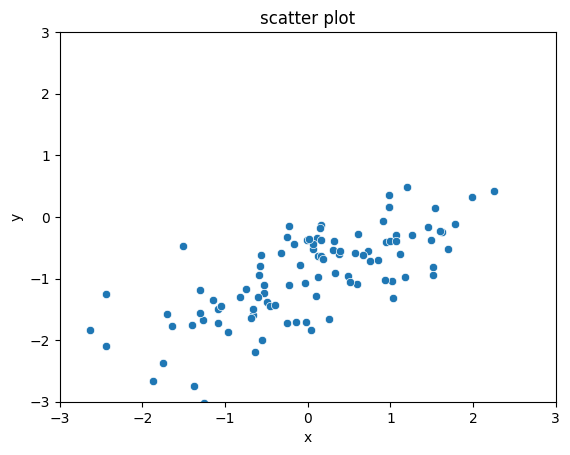

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     106.9
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           2.21e-17
Time:                        10:05:28   Log-Likelihood:                -71.531
No. Observations:                 100   AIC:                             147.1
Df Residuals:                      98   BIC:                             152.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9458      0.050    -18.916      0.0

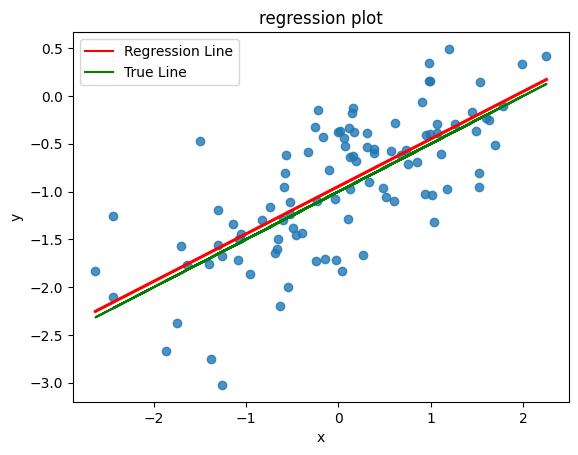

In [460]:
# BEGIN SOLUTION


#a
x = np.random.normal(0,1,100) #100 observations of mean = 0, variance = 1
x

#b
eps = np.random.normal(0,0.5,100) #100 observations of mean = 0, variance = 0.5 (variance up from 0.25...more noise)
eps

#c
y = -1 + (0.5*x) + eps
print(f'length of y is {len(y)}')

#d
sns.scatterplot(x=x,y=y)
plt.xlabel('x');
plt.ylabel('y'); #add label and remove weird output text with the addition of a semicolon
plt.xlim(-3,3)
plt.ylim(-3,3)
plt.title('scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#e
xC = sm.add_constant(x)
q6ModelMoreNoise = sm.OLS(y,xC).fit() #y dependent, x independent
print(q6ModelMoreNoise.summary())

#f
sns.regplot(x=x,y=y, line_kws={'color':'red'}, ci=False)
plt.plot([], [], label='Regression Line', color='red') #plot nothing to get an option to have a label for the regression line
plt.plot(x, -1+(0.5*x), label = 'True Line', color ='green' )
plt.title('regression plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

# END SOLUTION

> **_Answer:_**  [Here I have repeated steps a-f with an increase of 0.25 in the variance. The model fit has decreased by all metrics, most importantly R-squared, which decreased by 35%. Also, like the case of less noise, though even more pronounced here, the slope and intercept deviate further from the true values.].

j) What are the confidence intervals for $β_0$ and $β_1$ based on the original data set, the noisier data set, and the less noisy data set? Comment on your results.

In [461]:
# BEGIN SOLUTION

#original
print('original', '\n intercept:', q6Model.conf_int()[0], '\n coefficent:', q6Model.conf_int()[1])

#less noise
print('original', '\n intercept:', q6ModelLessNoise.conf_int()[0], '\n coefficent:', q6ModelLessNoise.conf_int()[1])

#more noise
print('original', '\n intercept:', q6ModelMoreNoise.conf_int()[0], '\n coefficent:', q6ModelMoreNoise.conf_int()[1])

# END SOLUTION

original 
 intercept: [-1.05339101 -0.95615187] 
 coefficent: [0.45277103 0.5389327 ]
original 
 intercept: [-1.02914912 -0.99433794] 
 coefficent: [0.49911557 0.53485187]
original 
 intercept: [-1.04501807 -0.84657455] 
 coefficent: [0.40130516 0.5919106 ]


> **_Answer:_**  [Here we can see that with more noise in our dataset, the confidence intervals are wider than with less noise. This makes sense as the accuracy of the regression fit will increase with less variance and decrease with more variance.].

#### Question 7
This question focuses on the collinearity problem.
 
(a) Perform the following commands first: 

In [462]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.normal(scale=0.1, size=100)
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=100)

The last line corresponds to creating a linear model in which $y$ is a function of $x_1$ and $x_2$. Write out the form of the linear model. What are the regression coefficients?

> **_Answer:_**  [The form of the linear model is $Y = 2X_1 + 0.3X_2 + 2 + Error$, where we have a vector of 100 values for $X_1$, $X_2$ and $Error$ that compute 100 values for $Y$. The coefficients are 2 and 0.3, which suggests that for each change in 2 units of $X_1$ and 0.3 units of $X_2$, we have one unit change of $Y$.]].

(b) What is the correlation between $x_1$ and $x_2$? Create a scatterplot displaying the relationship between the variables.

Correlation (Pearson's) between $X_1$ and $X_2$ is 0.8390596222844908


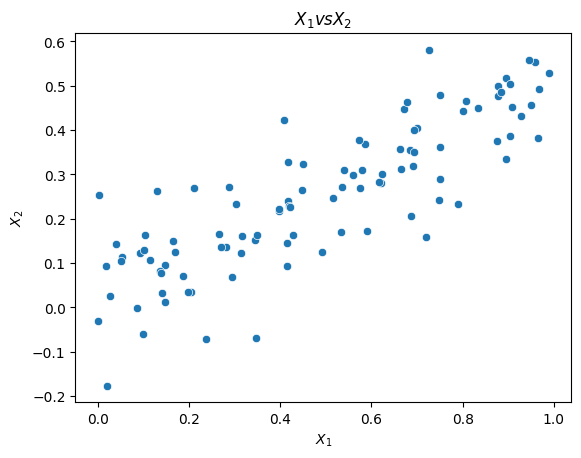

In [463]:
# BEGIN SOLUTION
from scipy.stats import pearsonr #for pearson correlation 
print(f'Correlation (Pearson\'s) between $X_1$ and $X_2$ is {pearsonr(x1,x2)[0]}')

plt.figure()
sns.scatterplot(x=x1, y=x2)
plt.xlabel('$X_1$');
plt.ylabel('$X_2$');
plt.title('$X_1 vs X_2$');


# END SOLUTION

(c) Using this data, fit a least squares regression to predict $y$ using $x_1$ and $x_2$. Describe the results obtained. What are $β_0$, $β_1$, and $β_2$? How do these relate to the true $β_10$, $β_1$, and $β_2$? Can you reject the null hypothesis $H_0$: $β_1$ = 0? How about the null hypothesis $H_0$: $β_2$ = 0?

In [464]:
# BEGIN SOLUTION

q7XFrame = pd.DataFrame(data = {'x1':x1, 'x2':x2}) #because we can only feed in a dataframe
q7XFrameC = sm.add_constant(q7XFrame)
q7Model = sm.OLS(y, q7XFrameC).fit()
print(q7Model.summary())

# END SOLUTION

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     17.09
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           4.40e-07
Time:                        10:05:28   Log-Likelihood:                -142.34
No. Observations:                 100   AIC:                             290.7
Df Residuals:                      97   BIC:                             298.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1893      0.199     11.021      0.0

> **_Answer:_**  [The fit of this model not great. We have a low R squared value of ~26.1% suggesting a poor fit. In this model we have coefficients for $β_0$, $β_1$, and $β_2$ of 2.19, 0.70, and 2.50, respectively. This varies signifianctly from the true values of $β_0$, $β_1$, and $β_2$ of 2, 0.3, and 2, respectively. Assuming a p-value alpha level cut off of 0.05 for $β_1$ we cannot reject the null hypothesis because the p-value is higher than 0.05, but for $B_2$ we can reject the null hypothesis as then p-value is below 0.05, suggesting statistical significance on the outcome of Y rather than chance.].

(d) Now fit a least squares regression to predict $y$ using only $x_1$. Comment on your results. Can you reject the null hypothesis $H_0$: $β_1$ = 0?

In [465]:
# BEGIN SOLUTION


x1C = sm.add_constant(x1)
q7ModelX1 = sm.OLS(y, x1C).fit()
print(q7ModelX1.summary())

# END SOLUTION

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     28.26
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           6.68e-07
Time:                        10:05:28   Log-Likelihood:                -144.76
No. Observations:                 100   AIC:                             293.5
Df Residuals:                      98   BIC:                             298.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2486      0.201     11.209      0.0

> **_Answer:_**  [For a model with just $X_1$ fit, we retain a poor fit with R squared at 22.4%. However, we can reject the null hypothesis that $X_1$ has no statistical effect on $Y$ because our p-value is small and well below 0.0001.].

(e) Now fit a least squares regression to predict $y$ using only $x_2$. Comment on your results. Can you reject the null hypothesis $H_0$: $β_1$ = 0?

In [466]:
# BEGIN SOLUTION

x2C = sm.add_constant(x2)
q7ModelX2 = sm.OLS(y, x2C).fit()
print(q7ModelX2.summary())

# END SOLUTION

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     32.87
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           1.09e-07
Time:                        10:05:28   Log-Likelihood:                -142.97
No. Observations:                 100   AIC:                             289.9
Df Residuals:                      98   BIC:                             295.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2655      0.187     12.145      0.0

> **_Answer:_**  [Once again, our fit is very poor with an R squared of 25.1%, but we can reject the null hypothesis for $X_1$ as our p-value is small.].

(f) Do the results obtained in (c)–(e) contradict each other? Explain your answer.

> **_Answer:_**  [Yes, because when we fit both $X_1$ and $X_2$, we have a poor fit, but only one coefficient ($X_2$) is statistically significant. But when we separate out the variables and fit them separately we have statistical significance for both coefficents, yet a worse fit for the separated models.].

(g) Now suppose we obtain one additional observation, which was unfortunately mismeasured. Make up a new data point for this observation and re-fit the linear models from parts (c) to (e). What effect does this new observation have on each of the models? In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     4200.
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           1.07e-95
Time:                        10:05:28   Log-Likelihood:                -138.88
No. Observations:                 101   AIC:                             283.8
Df Residuals:                      98   BIC:                             291.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9352      0.125     15.463      0.0

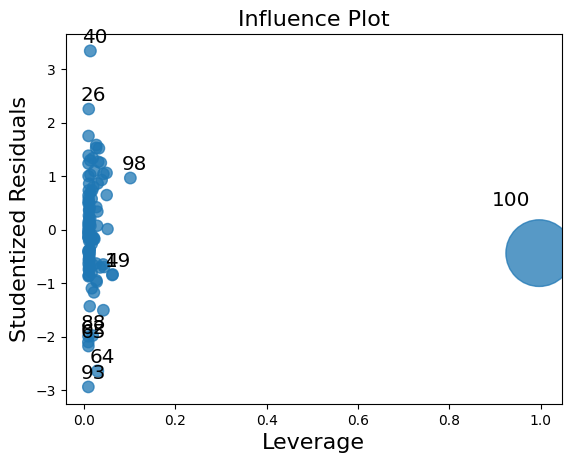

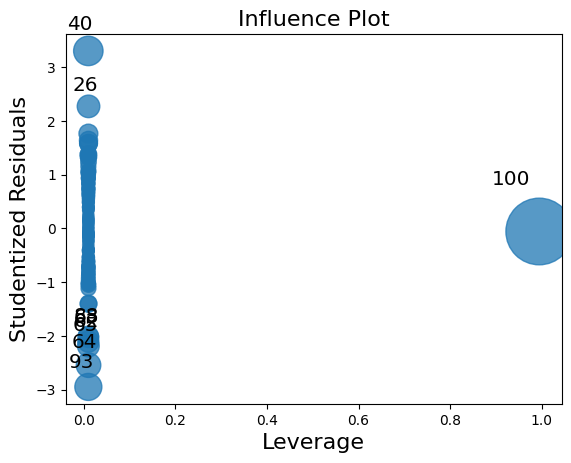

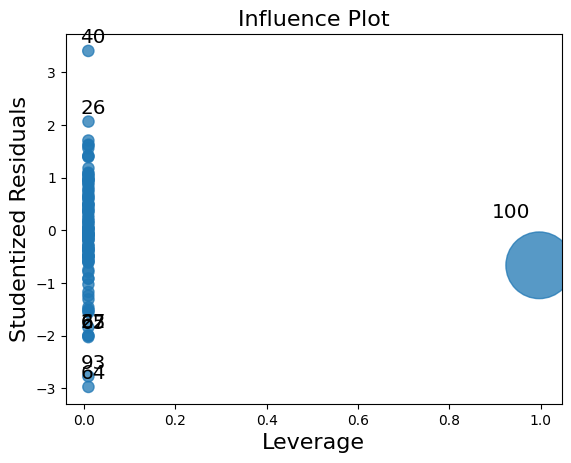

In [467]:
# BEGIN SOLUTION

#modify data
x1 = np.append(x1,40) #add our points here with append
x2 = np.append(x2,28)
y = 2 + 2 * x1 + 0.3 * x2 + np.random.normal(size=101) #add one more point to error

#c
q7XFrame = pd.DataFrame(data = {'x1':x1, 'x2':x2}) #because we can only feed in a dataframe
q7XFrameC = sm.add_constant(q7XFrame)
q7Model = sm.OLS(y, q7XFrameC).fit()
print(q7Model.summary())
influ = sm.graphics.influence_plot(q7Model, criterion="cooks") 


#d
x1C = sm.add_constant(x1)
q7ModelX1 = sm.OLS(y, x1C).fit()
print(q7ModelX1.summary())
influ = sm.graphics.influence_plot(q7ModelX1, criterion="cooks") 


#e
x2C = sm.add_constant(x2)
q7ModelX2 = sm.OLS(y, x2C).fit()
print(q7ModelX2.summary())
influ = sm.graphics.influence_plot(q7ModelX2, criterion="cooks") 



# END SOLUTION

> **_Answer:_**  [The R-squared of each model appears to become almost perfect, which is no probable as we can't perfectly recreate the data with an inflexible linear model, just simulate to a close degree. The observation for each is most definitely an outlier as 100 of the values are within -1 and 1 and the new observations are 28 and 40. Based on our influence plots, the last points, which are at index 100, have the largest cooks distance and leverage of 1.0 suggesting that they are influencing the model to such a degree that it is useless.].

#### Question 8

It is claimed that in the case of simple linear regression of $Y$ onto $X$, the $R^2$ statistic is equal to the square of the correlation between $X$ and $Y$. Generate some synthetic data and show that this is the case.

In [468]:
# BEGIN SOLUTION



# END SOLUTION

### Extra credit

#### Question 1

Consider the fitted values that result from performing linear regression without an intercept. In this setting, the ith fitted value takes the form 
$$
\hat{y}_i = x_i \hat{\beta}
$$

Where, 
$$
\hat{\beta} = \left( \sum_{i=1}^n x_{i} y_{i} \right) / \left( \sum_{i'=1}^n x_{i'}^2 \right)
$$

Show that we can write
$$
\hat{y}_i = \sum_{i'=1}^n a'_i y'_i
$$

What is $a'_i$?

> **_Answer:_**  [BEGIN SOLUTION].

#### Question 2

Given that,
$$\hat{\beta}_1 = \dfrac{\displaystyle\sum\limits_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y}) }{\displaystyle \sum\limits_{i=1}^{n}(x_i-\bar{x})^2}\text{,}$$
and $\hat{\beta}_0 = \bar{y}-\hat{\beta}_1\bar{x}$, argue that in the case of simple linear regression, the least squares line always passes through the point ($\bar{x}$, $\bar{y}$).

> **_Answer:_**  [BEGIN SOLUTION].